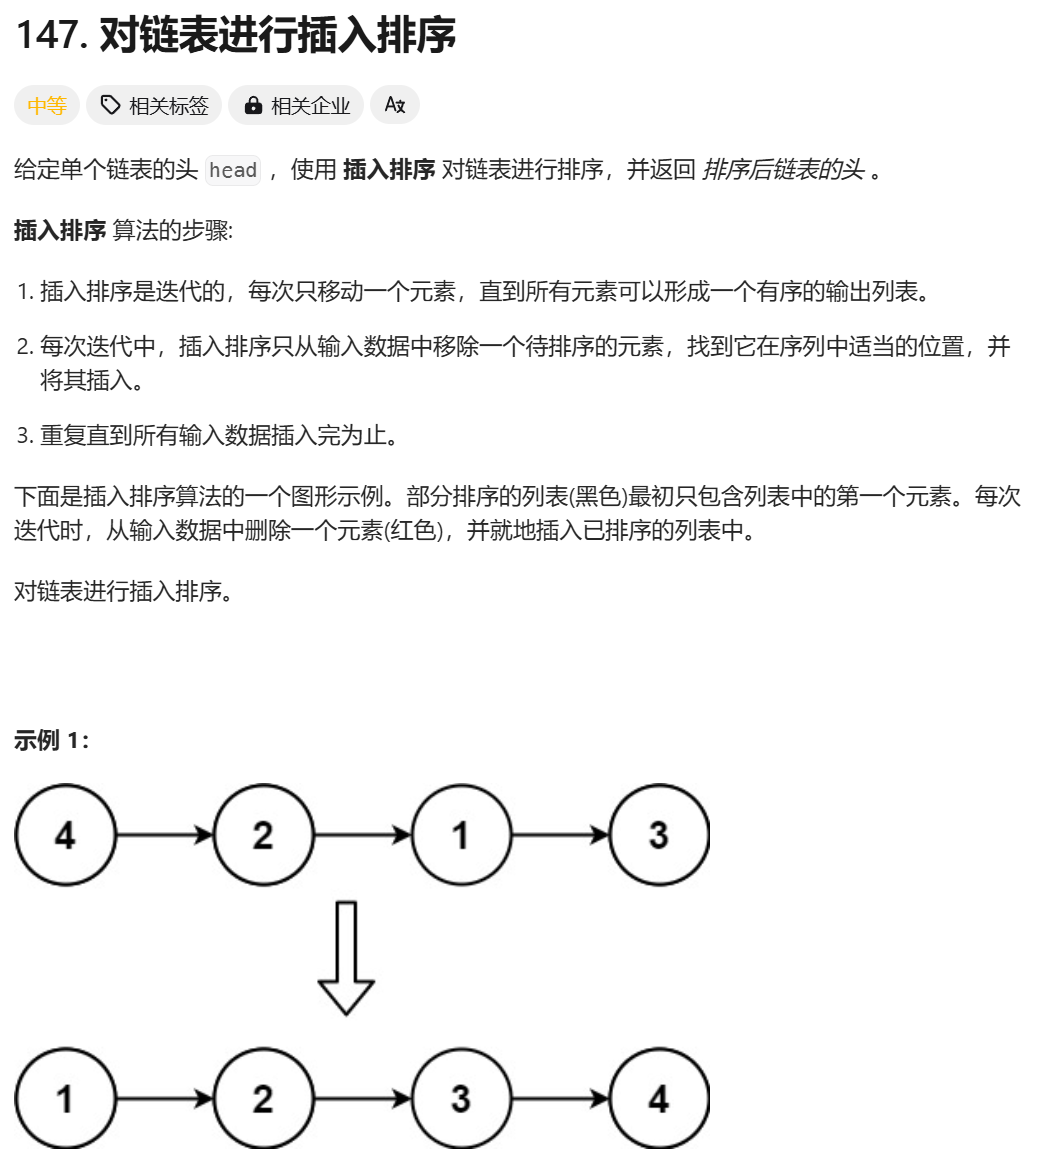

# 新建一个链表然后找到合适位置插入


In [12]:
# Definition for singly-linked list.
from typing import Optional 
from math import inf

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def insertionSortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head
        # 新建一个链表然后找到合适位置插入
        dummy_head = ListNode(0, head)
        cur = dummy_head.next
        
        new_head = ListNode(-inf, None)
        cur2 = new_head
        while cur != None: # cur 只要往后移动就好了
            while cur2.next  and cur2.next.val < cur.val:
                cur2 = cur2.next
            # 还要连后面的
            temp = cur2.next
            cur2.next = cur
            temp2 = cur.next
            cur2.next.next = temp
            
            cur2 = new_head # 回到一开始去找合适位置
            # 再在原链表删除第一个节点,这时候的后一个是新链表的下一个，所以得保存
            dummy_head.next = temp2
            cur = dummy_head.next
        return new_head.next
            

array = [3, 2, 4, 1, 9]
head = ListNode(array[0])
cur = head
for i in range(1, len(array)):
    node = ListNode(array[i])
    cur.next = node
    cur = cur.next

test = Solution()
head = test.insertionSortList(head)

cur = head
while cur:
    print(cur.val, end="->")
    cur = cur.next
print("None")



1->2->3->4->9->None


## 在原链表上改动

In [15]:
# Definition for singly-linked list.
from typing import Optional 
from math import inf

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def insertionSortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head
        dummy = ListNode()
        dummy.next = head
        cur = head # cur是将要比较的对象
        last_sorted = head # 是已排序的最后一个 
        while cur.next != None:
            cur = cur.next
            if last_sorted.val <= cur.val:  # 先处理简单情况，将较大的节点直接接到后面, 也就是直接后移一个
                last_sorted = last_sorted.next
            else:
                pre = dummy  # 是要插入的前一个节点的位置
                while pre.next.val < cur.val:
                    pre = pre.next
                last_sorted.next = cur.next # 顺序很重要
                cur.next = pre.next
                pre.next = cur
                cur = last_sorted
        return dummy.next

array = [3, 2, 4, 1, 9]
head = ListNode(array[0])
cur = head
for i in range(1, len(array)):
    node = ListNode(array[i])
    cur.next = node
    cur = cur.next

test = Solution()
head = test.insertionSortList(head)

cur = head
while cur:
    print(cur.val, end="->")
    cur = cur.next
print("None")



1->2->3->4->9->None
